In [5]:
import pandas as pd 



In [7]:
df = pd.read_csv('IOT.csv')
df.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1.0,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2.0,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3.0,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4.0,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [9]:
# Replace dots with underscores in column names
df.columns = df.columns.str.replace(r'\.', '_', regex=True)

# Drop Unnamed Column
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Unnamed: 0,id_orig_p,id_resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active_std,idle_min,idle_max,idle_tot,idle_avg,idle_std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0.0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1.0,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2.0,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3.0,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4.0,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


Information taken from DF Source.  

Attacks patterns Details:

DOS_SYN_Hping------------------------94659  
ARP_poisoning--------------------------7750  
NMAP_UDP_SCAN--------------------2590  
NMAP_XMAS_TREE_SCAN--------2010  
NMAP_OS_DETECTION-------------2000  
NMAP_TCP_scan-----------------------1002  
DDOS_Slowloris------------------------534  
Metasploit_Brute_Force_SSH---------37  
NMAP_FIN_SCAN---------------------28  
Normal Patterns Details:  

MQTT -----------------------------------8108  
Thing_speak-----------------------------4146  
Wipro_bulb_Dataset-------------------253  
Amazon-Alexa -----------------------86842  

## Adding a Boolean Column to Dataset for Attack_type

In [13]:
df.shape

(123117, 85)

In [35]:
# Create a new column 'Attack' based on the 'Attack_type' column
df['Attack'] = df['Attack_type'].apply(lambda x: 'Normal' if x in ['Thing_Speak', 'MQTT_Publish', 'Wipro_bulb'] else 'Attack')

In [36]:
df['Attack'].value_counts()

Attack
Attack    110610
Normal     12507
Name: count, dtype: int64

# Understanding the Data

| # | Feature | Type | Data Type | Description |
|---|---------|------|-----------|-------------|
| 1 | id.orig_p | Integer | Integer | The network port used by the origin source |
| 2 | id.resp_p | Integer | Integer | The network port used by the responding device |
| 3 | proto | Categorical | Object | The protocol utilized in the connection |
| 4 | service | Continuous | Object | The type of service used in the connection |
| 5 | flow_duration | Continuous | Float | How long the connection lasted between devices |
| 6 | fwd_pkts_tot | Integer | Integer | Total packets forwarded in the session |
| 7 | bwd_pkts_tot | Integer | Integer | Total packets backward (returned) in the session |
| 8 | fwd_data_pkts_tot | Integer | Integer | Total data packets forwarded in the session (excluding control packets) |
| 9 | bwd_data_pkts_tot | Integer | Integer | Total data packets backward in the session (excluding control packets) |
| 10 | fwd_pkts_per_sec | Continuous | Float | Rate of packets forwarded per second |
| 11 | bwd_pkts_per_sec | Continuous | Float | Rate of packets backward per second |
| 12 | flow_pkts_per_sec | Continuous | Float | Combined rate of packets per second |
| 13 | down_up_ratio | Continuous | Float | Ratio of downstream to upstream traffic |
| 14 | fwd_header_size_tot | Integer | Integer | Total size of the header forwarded |
| 15 | fwd_header_size_min | Integer | Integer | Smallest header size sent |
| 16 | fwd_header_size_max | Integer | Integer | Largest header size sent |
| 17 | bwd_header_size_tot | Integer | Integer | Total size of the header returned |
| 18 | bwd_header_size_min | Integer | Integer | Smallest header size returned |
| 19 | bwd_header_size_max | Integer | Integer | Largest header size returned |
| 20 | flow_FIN_flag_count | Integer | Integer | Count of FIN flags signaling the end of data transmission in a session |
| 21 | flow_SYN_flag_count | Integer | Integer | Count of SYN flags used to initiate and establish sessions |
| 22 | flow_RST_flag_count | Integer | Integer | Count of RST flags used to abruptly terminate sessions |
| 23 | fwd_PSH_flag_count | Integer | Integer | Count of PSH flags in forward packets indicating the push of buffered data to the receiving application |
| 24 | bwd_PSH_flag_count | Integer | Integer | Count of PSH flags in backward packets indicating the push of buffered data to the sending application |
| 25 | flow_ACK_flag_count | Integer | Integer | Count of ACK flags used to acknowledge the receipt of packets |
| 26 | fwd_URG_flag_count | Integer | Integer | Count of URG flags in forwarded packets indicating data should be processed urgently |
| 27 | bwd_URG_flag_count | Integer | Integer | Count of URG flags in backward packets indicating data should be processed urgently |
| 28 | flow_CWR_flag_count | Integer | Integer | Count of CWR (Congestion Window Reduced) flags used by the sender to signal congestion control |
| 29 | flow_ECE_flag_count | Integer | Integer | Count of ECE (ECN Echo) flags indicating network congestion without dropping packets |
| 30 | fwd_pkts_payload.min | Continuous | Integer | Minimum payload size in forwarded packets |
| 31 | fwd_pkts_payload.max | Continuous | Integer | Maximum payload size in forwarded packets |
| 32 | fwd_pkts_payload.tot | Continuous | Integer | Total payload size in forwarded packets |
| 33 | fwd_pkts_payload.avg | Continuous | Float | Average payload size in forwarded packets |
| 34 | fwd_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in forwarded packets |
| 35 | bwd_pkts_payload.min | Continuous | Integer | Minimum payload size in backward packets |
| 36 | bwd_pkts_payload.max | Continuous | Integer | Maximum payload size in backward packets |
| 37 | bwd_pkts_payload.tot | Continuous | Integer | Total payload size in backward packets |
| 38 | bwd_pkts_payload.avg | Continuous | Float | Average payload size in backward packets |
| 39 | bwd_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in backward packets |
| 40 | flow_pkts_payload.min | Continuous | Integer | Minimum payload size in the flow |
| 41 | flow_pkts_payload.max | Continuous | Integer | Maximum payload size in the flow |
| 42 | flow_pkts_payload.tot | Continuous | Integer | Total payload size in the flow |
| 43 | flow_pkts_payload.avg | Continuous | Float | Average payload size in the flow |
| 44 | flow_pkts_payload.std | Continuous | Float | Standard deviation of payload sizes in the flow |
| 45 | fwd_iat.min | Continuous | Float | Minimum inter-arrival time of forwarded packets |
| 46 | fwd_iat.max | Continuous | Float | Maximum inter-arrival time of forwarded packets |
| 47 | fwd_iat.tot | Continuous | Float | Total inter-arrival time of forwarded packets |
| 48 | fwd_iat.avg | Continuous | Float | Average inter-arrival time of forwarded packets |
| 49 | fwd_iat.std | Continuous | Float | Standard deviation of inter-arrival times of forwarded packets |
| 50 | bwd_iat.min | Continuous | Float | Minimum inter-arrival time of backward packets |
| 51 | bwd_iat.max | Continuous | Float | Maximum inter-arrival time of backward packets |
| 52 | bwd_iat.tot | Continuous | Float | Total inter-arrival time of backward packets |
| 53 | bwd_iat.avg | Continuous | Float | Average inter-arrival time of backward packets |
| 54 | bwd_iat.std | Continuous | Float | Standard deviation of inter-arrival times of backward packets |
| 55 | flow_iat.min | Continuous | Float | Minimum inter-arrival time in the flow |
| 56 | flow_iat.max | Continuous | Float | Maximum inter-arrival time in the flow |
| 57 | flow_iat.tot | Continuous | Float | Total inter-arrival time in the flow |
| 58 | flow_iat.avg | Continuous | Float | Average inter-arrival time in the flow |
| 59 | flow_iat.std | Continuous | Float | Standard deviation of inter-arrival times in the flow |
| 60 | payload_bytes_per_second | Continuous | Float | Rate of payload transmission in bytes per second |
| 61 | fwd_subflow_pkts | Continuous | Float | Forward subflow packet count |
| 62 | bwd_subflow_pkts | Continuous | Float | Backward subflow packet count |
| 63 | fwd_subflow_bytes | Continuous | Float | Forward subflow byte count |
| 64 | bwd_subflow_bytes | Continuous | Float | Backward subflow byte count |
| 65 | fwd_bulk_bytes | Continuous | Float | Forward bulk byte count |
| 66 | bwd_bulk_bytes | Continuous | Float | Backward bulk byte count |
| 67 | fwd_bulk_packets | Continuous | Float | Forward bulk packet count |
| 68 | bwd_bulk_packets | Continuous | Float | Backward bulk packet count |
| 69 | fwd_bulk_rate | Continuous | Float | Rate of bulk data transmission in the forward direction |
| 70 | bwd_bulk_rate | Continuous | Float | Rate of bulk data transmission in the backward direction |
| 71 | active.min | Continuous | Float | Minimum time the flow was active before going idle |
| 72 | active.max | Continuous | Float | Maximum time the flow was active before going idle |
| 73 | active.tot | Continuous | Float | Total time the flow was active before going idle |
| 74 | active.avg | Continuous | Float | Average time the flow was active before going idle |
| 75 | active.std | Continuous | Float | Standard deviation of active times before the flow went idle |
| 76 | idle.min | Continuous | Float | Minimum time the flow was idle |
| 77 | idle.max | Continuous | Float | Maximum time the flow was idle |
| 78 | idle.tot | Continuous | Float | Total time the flow was idle |
| 79 | idle.avg | Continuous | Float | Average time the flow was idle |
| 80 | idle.std | Continuous | Float | Standard deviation of idle times |
| 81 | fwd_init_window_size | Integer | Integer | Initial window size in forwarded TCP connections, indicative of congestion handling |
| 82 | bwd_init_window_size | Integer | Integer | Initial window size in backward TCP connections, indicative of congestion handling |
| 83 | fwd_last_window_size | Integer | Integer | Last window size observed in forwarded TCP connections, can indicate changes in network conditions |
| 84 | Attack_type | Categorical | Object | Specifies the type of network traffic, whether normal or related to specific types of network attacks |


# Understanding Attack_type and relevant features

In [42]:
df['Attack_type'].value_counts()

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64

The Attack_type column, includes different types of Attack_types. Each attack type listed influences the features mentioned in specific ways, which can help identify and characterize these cyber-attacks based on their unique traffic patterns. Here’s how the different attack types might impact the given features:

#### Attack_type_ARP_poisoning  
id.orig_p & id.resp_p: Unusually high activity on network ports.  
proto: Typically, ARP packets; not TCP/UDP.  
service: Not applicable as ARP is at the data link layer.  
flow_duration: Short bursts indicating brief communication.  
fwd_pkts_tot, bwd_pkts_tot: Moderate packet totals due to back-and-forth communication.  
flow_SYN_flag_count & flow_ACK_flag_count: Not relevant, as ARP does not use TCP.  
fwd/bwd_iat: Low inter-arrival times due to rapid packet exchange.  

#### Attack_type_DDOS_Slowloris
id.resp_p: Commonly targets port 80 (HTTP).  
proto: TCP.  
flow_duration: Long-lasting connections with very low data transfer rates.  
fwd_pkts_tot: High count due to slow and steady packet transmission.  
flow_SYN_flag_count: High, indicating numerous connection attempts.  
fwd_iat: High variability, showing intermittent packet sending.  
idle.avg & idle.max: Long idle times between small bursts.  

#### Attack_type_DOS_SYN_Hping
id.orig_p & id.resp_p: Targets varied ports; often higher ports in range.  
proto: TCP.  
flow_duration: Short-lived, numerous connections.  
fwd_pkts_tot: High, due to repetitive SYN packets.  
flow_SYN_flag_count: Extremely high.  
fwd_iat: Low average, indicating rapid successive SYN packets.  
fwd_header_size_tot: Consistently similar, indicating repetitive structure.  

#### Attack_type_MQTT_Publish
id.orig_p & id.resp_p: Typically, ports used by MQTT (e.g., 1883).  
proto: TCP.  
flow_duration: Medium, related to data publishing events.  
fwd_data_pkts_tot: Moderate-to-high, depending on the message payload.  
flow_ACK_flag_count: High, due to acknowledgment packets for reliability.  
payload_bytes_per_second: Indicates the rate of published data transfer.  
fwd_iat: Consistent for continuous data streams.  

#### Attack_type_Metasploit_Brute_Force_SSH
id.resp_p: Typically port 22 (SSH).  
proto: TCP.  
flow_duration: Multiple, short-lived attempts.  
fwd_pkts_tot: High, due to repeated login attempts.  
flow_SYN_flag_count & flow_RST_flag_count: High; SYN for initiation and RST for failed attempts.  
fwd/bwd_data_pkts_tot: Low; failed attempts do not carry substantial data.  
flow_iat: Small variance, consistent retry timing.  

#### Attack_type_NMAP_FIN_SCAN
id.orig_p & id.resp_p: Can target a wide range of ports.  
proto: TCP.  
flow_FIN_flag_count: High, indicating FIN flags used for stealth scans.  
fwd_pkts_tot: Low, since FIN packets don’t establish connections.  
fwd_iat.avg: Low, as packets are sent in quick succession.  
idle.min: Low, indicating brief pauses between scans.  

#### Attack_type_NMAP_FIN_SCAN
id.orig_p & id.resp_p: Can target a wide range of ports.  
proto: TCP.  
flow_FIN_flag_count: High, indicating FIN flags used for stealth scans.  
fwd_pkts_tot: Low, since FIN packets don’t establish connections.  
fwd_iat.avg: Low, as packets are sent in quick succession.  
idle.min: Low, indicating brief pauses between scans.  

#### Attack_type_NMAP_OS_DETECTION
proto: TCP/UDP with specific flags to determine OS responses.  
fwd_pkts_tot, bwd_pkts_tot: Low, typically involves a few probing packets.  
flow_ACK_flag_count & flow_FIN_flag_count: Relevant depending on detection methods used.  
flow_iat: Low variance, as detection involves consistent packet intervals.  

#### Attack_type_NMAP_TCP_scan
id.resp_p: Varied; scans all ports to identify open ones.  
proto: TCP.  
flow_SYN_flag_count: High, if SYN scans are used.  
flow_RST_flag_count: High, for ports that respond with RST.  
fwd_pkts_per_sec: High packet rate due to fast scanning.  
fwd_iat.avg: Low; rapid packet intervals.  

#### Attack_type_NMAP_UDP_SCAN
id.orig_p & id.resp_p: Targets various UDP ports.  
proto: UDP.  
fwd_data_pkts_tot: Low, as UDP packets for scans are minimal in size.  
fwd_iat: Moderate variability due to delayed responses from UDP.  
flow_duration: Varies based on timeout for responses.  

#### Attack_type_NMAP_XMAS_TREE_SCAN
proto: TCP.  
flow_FIN_flag_count, flow_PSH_flag_count, flow_URG_flag_count: High, as these flags are used for XMAS scans  .
fwd_pkts_tot: Low; minimal packet count for stealt  h.
fwd_header_size_tot: Indicates packets with all control bits s  et.


In [58]:
df.isnull().sum().sum()

0

In [60]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123117 entries, 0 to 123116
Data columns (total 86 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                123117 non-null  float64
 1   id_orig_p                 123117 non-null  int64  
 2   id_resp_p                 123117 non-null  int64  
 3   proto                     123117 non-null  object 
 4   service                   123117 non-null  object 
 5   flow_duration             123117 non-null  float64
 6   fwd_pkts_tot              123117 non-null  int64  
 7   bwd_pkts_tot              123117 non-null  int64  
 8   fwd_data_pkts_tot         123117 non-null  int64  
 9   bwd_data_pkts_tot         123117 non-null  int64  
 10  fwd_pkts_per_sec          123117 non-null  float64
 11  bwd_pkts_per_sec          123117 non-null  float64
 12  flow_pkts_per_sec         123117 non-null  float64
 13  down_up_ratio             123117 non-null  f

Everything is Integer or Float, except Attack_type, proto and service. Attack_type will be my Target. Lets look at proto and service.

In [63]:
df.proto.value_counts()

proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64

In [65]:
df.service.value_counts()

service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64

As seen in the Attack_type and features potentially impacting them, these seem useful

# Distributions

In [67]:
# import train_test_split function to execute the split
from sklearn.model_selection import train_test_split

In [69]:
# Isolate the train test
train, val_test = train_test_split(
    df,
    train_size=0.8,
    test_size=0.2,
    random_state= 0,
    stratify=df.Attack_type)

In [71]:
# verify the sizes
print(train.shape)
print(val_test.shape)

(98493, 86)
(24624, 86)


In [73]:
# Check the distribution of the variable
train.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768857
Thing_Speak                   0.065852
ARP_poisioning                0.062949
MQTT_Publish                  0.033678
NMAP_UDP_SCAN                 0.021037
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016245
NMAP_TCP_scan                 0.008143
DDOS_Slowloris                0.004335
Wipro_bulb                    0.002051
Metasploit_Brute_Force_SSH    0.000305
NMAP_FIN_SCAN                 0.000223
Name: proportion, dtype: float64

In [75]:
# Check the distribution of the variable
val_test.Attack_type.value_counts(normalize=True)

Attack_type
DOS_SYN_Hping                 0.768843
Thing_Speak                   0.065871
ARP_poisioning                0.062947
MQTT_Publish                  0.033666
NMAP_UDP_SCAN                 0.021036
NMAP_XMAS_TREE_SCAN           0.016326
NMAP_OS_DETECTION             0.016244
NMAP_TCP_scan                 0.008122
DDOS_Slowloris                0.004345
Wipro_bulb                    0.002071
Metasploit_Brute_Force_SSH    0.000284
NMAP_FIN_SCAN                 0.000244
Name: proportion, dtype: float64

# Exploring Features

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

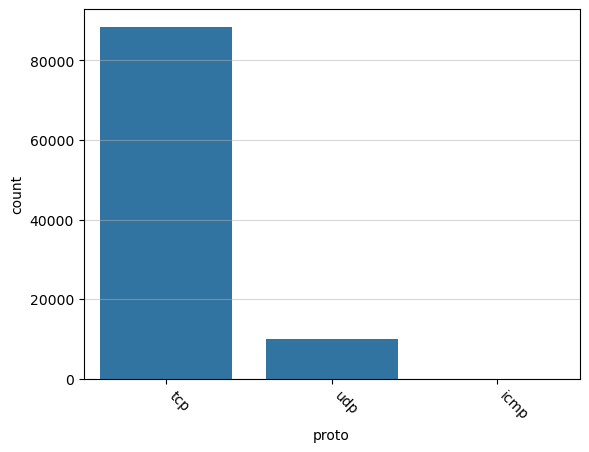

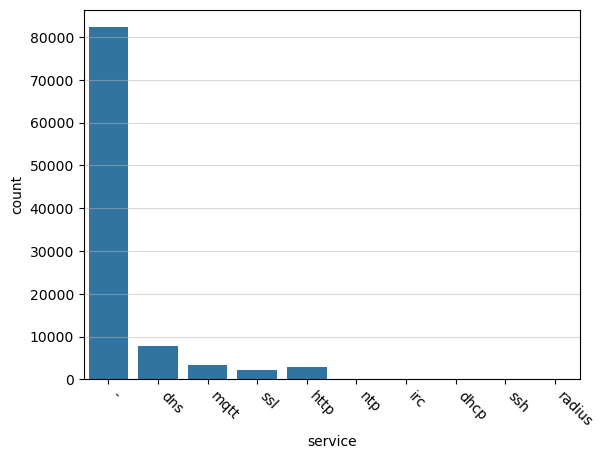

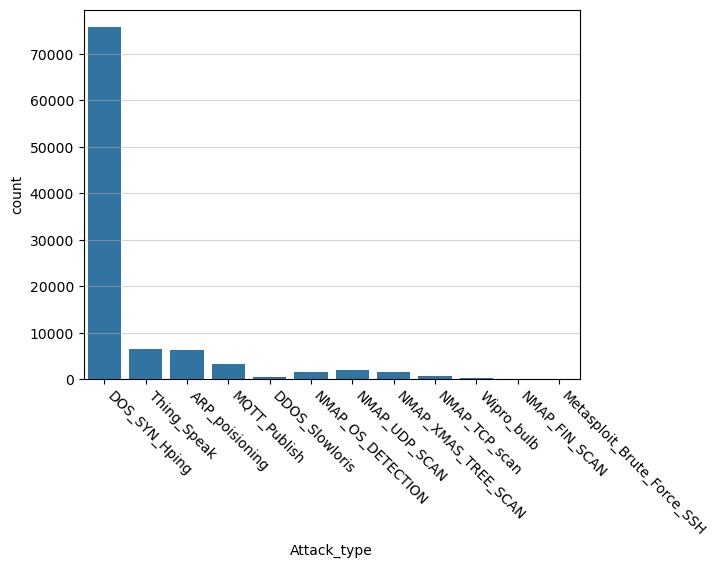

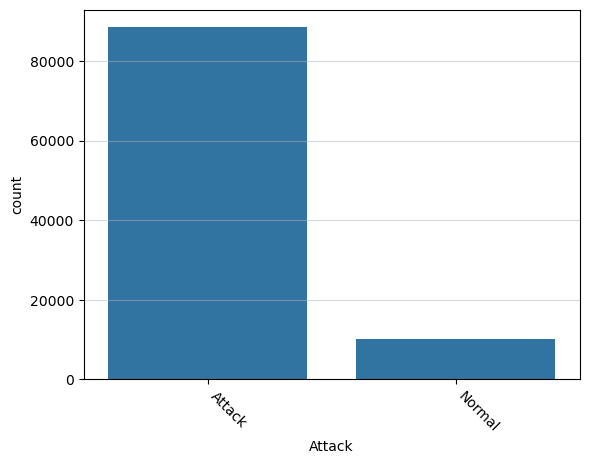

In [80]:
for col in train.columns:
    if train[col].dtype == "object":
        sns.countplot(train, x=col)
        plt.xticks(rotation=-45,ha="left")
        plt.grid(alpha=0.5,axis='y')
        plt.show()

# Feature Deep Dive

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

### Attack Distribution across Dataset

/var/folders/ld/275050r97dd74s4xh62v6x9m0000gn/T/ipykernel_46944/2873871272.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot( data=train, kind='count', x='Attack', palette={'Attack':'red','Normal':'blue'})


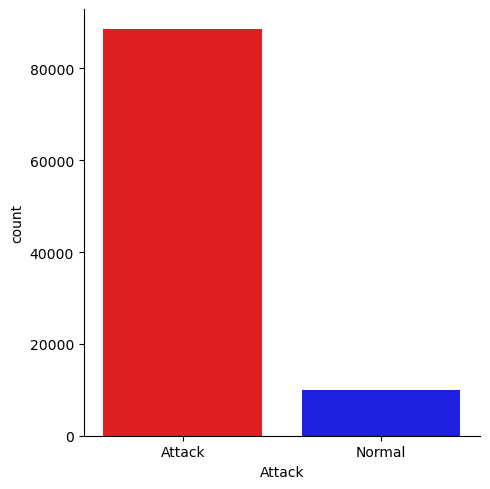

In [86]:
sns.catplot( data=train, kind='count', x='Attack', palette={'Attack':'red','Normal':'blue'})

plt.show()

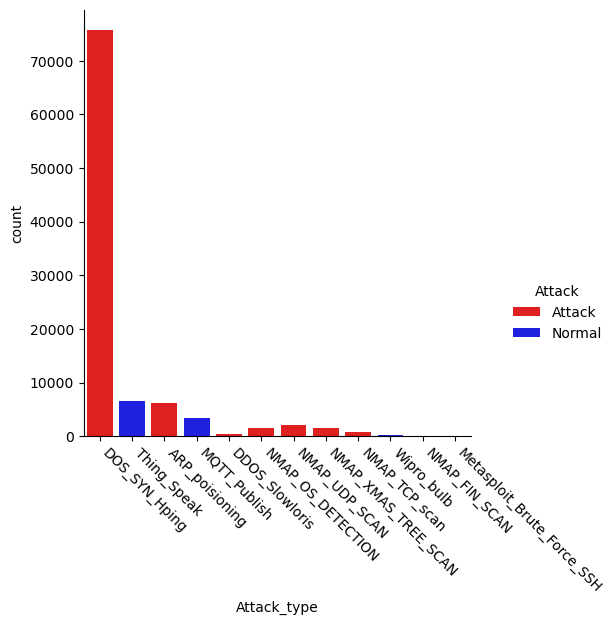

In [88]:
sns.catplot( data=train, kind='count', x='Attack_type', hue='Attack', palette={'Attack':'red','Normal':'blue'})

plt.xticks(rotation=-45,ha="left")
plt.show()

### Attack Patterns across flow duration and size of packets

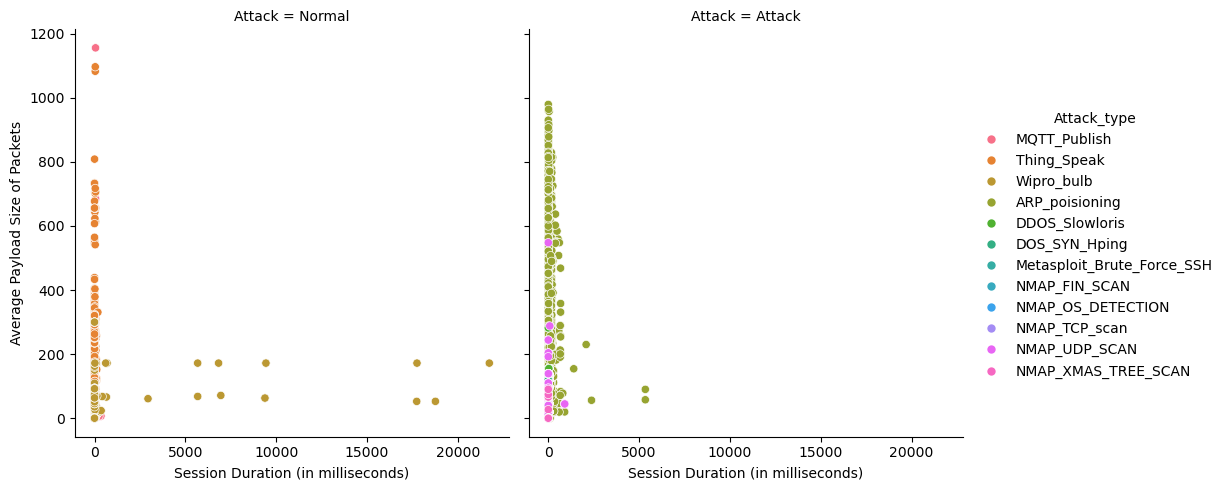

In [255]:
sns.relplot(
    data=df,
    x='flow_duration',
    y='flow_pkts_payload_avg',
    hue='Attack_type',
    kind='scatter',
    col='Attack').set_axis_labels("Flow Duration (in milliseconds)", "Average Payload Size of Packets")

plt.show()

### Distribution of types of services for Attacks

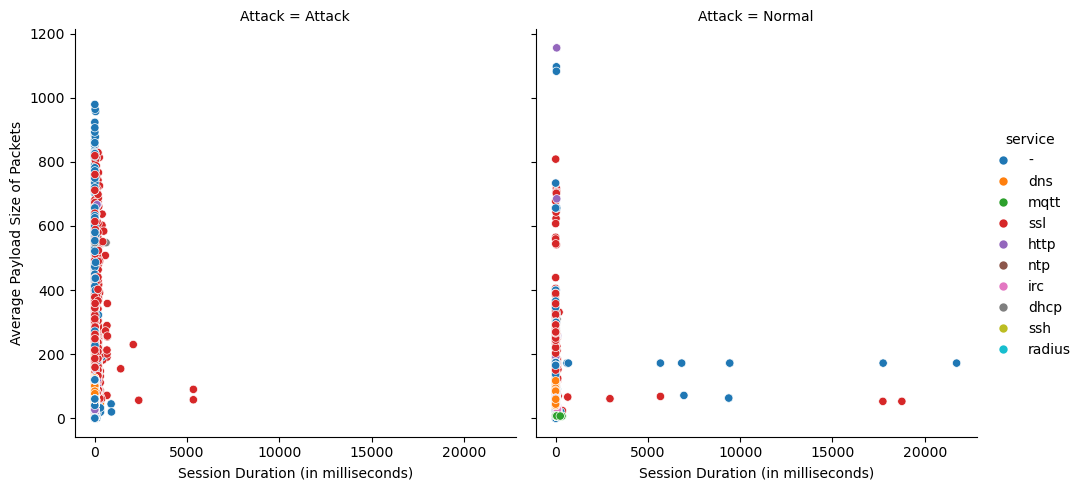

In [262]:
sns.relplot(
    data=train,
    x='flow_duration',
    y='flow_pkts_payload_avg',
    hue='service',
    kind='scatter',
    col='Attack'
).set_axis_labels("Flow Duration (in milliseconds)", "Average Payload Size of Packets")

plt.show()

### Distribution of protocols for attack types

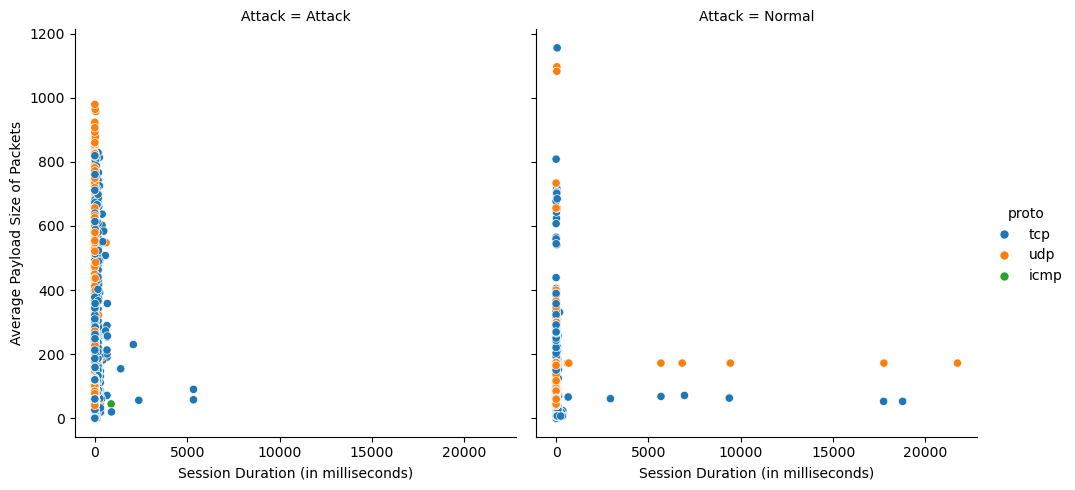

In [266]:
sns.relplot(
    data=train,
    x='flow_duration',
    y='flow_pkts_payload_avg',
    hue='proto',
    kind='scatter',
    col='Attack'
).set_axis_labels("Flow Duration (in milliseconds)", "Average Payload Size of Packets")

plt.show()

### Services targeted by Attacks

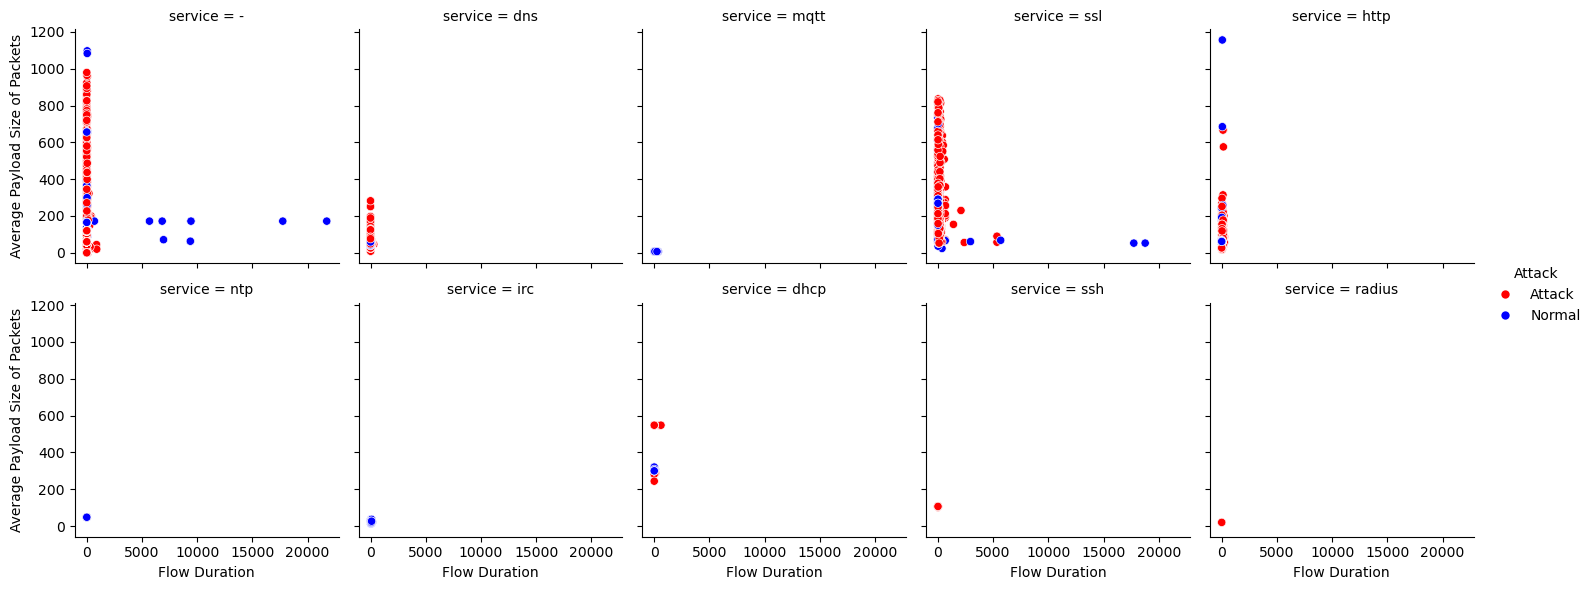

In [92]:
sns.relplot(
    data=train,
    x='flow_duration',
    y='flow_pkts_payload_avg',
    hue='Attack',
    palette={"Attack": "red", "Normal": "blue"},
    kind='scatter',
    col='service',
    col_wrap=5,
    height=3,
    aspect=1 ).set_axis_labels("Flow Duration", "Average Payload Size of Packets")

plt.show()

### Protocols targeted by Attacks

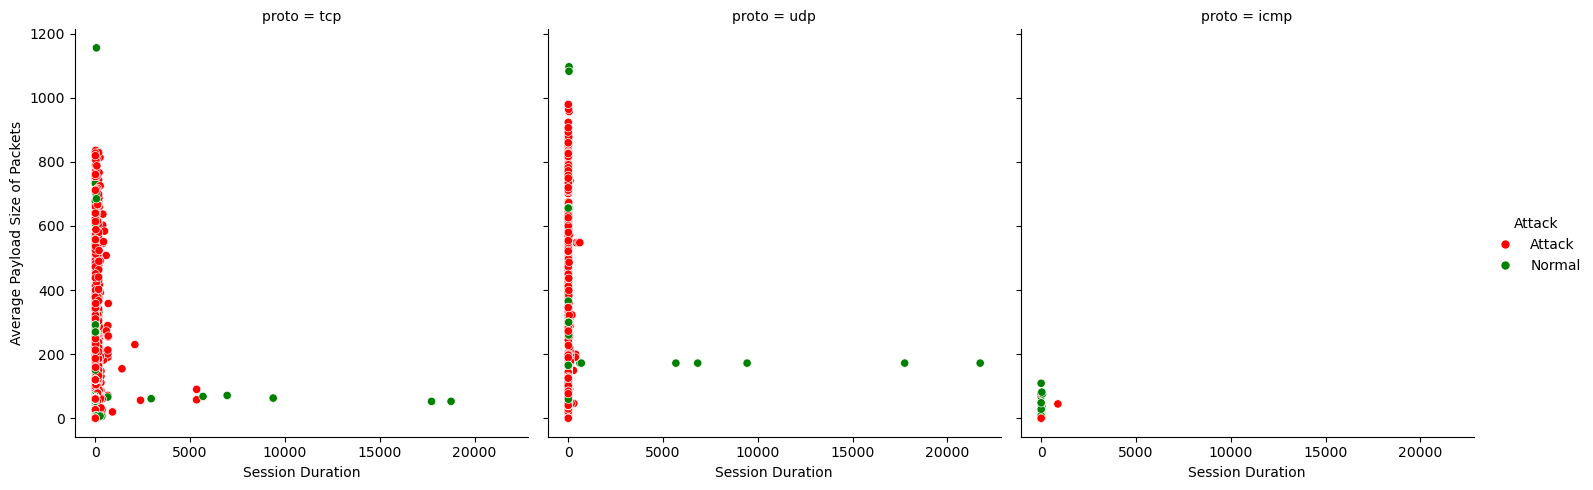

In [286]:
sns.relplot(
    data=train,
    x='flow_duration',
    y='flow_pkts_payload_avg',
    hue='Attack',
    palette={"Attack": "red", "Normal": "green"},
    kind='scatter',
    col='proto'
).set_axis_labels("Session Duration", "Average Payload Size of Packets")

plt.show()

In [316]:
numeric_features = df.select_dtypes(include=['number']).columns
numeric_df = df[numeric_features]

In [318]:
corr_df = numeric_df.corr()

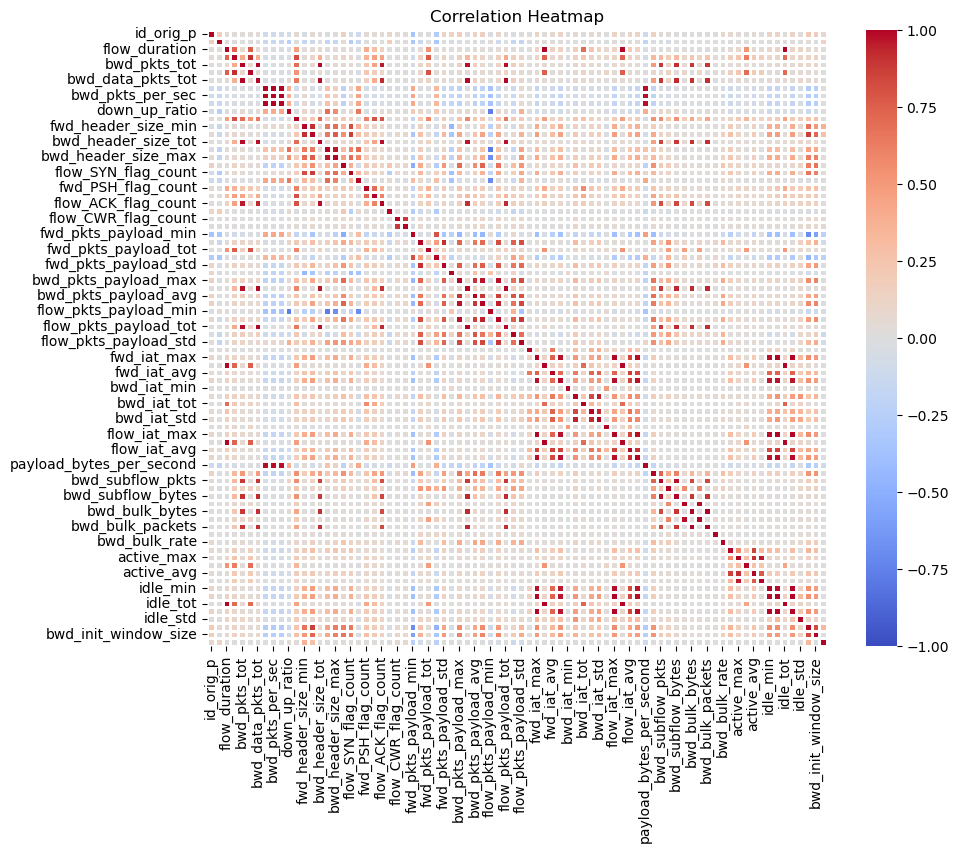

In [320]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=False, cmap='coolwarm', vmin=-1, vmax=1, linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [322]:
# Looking at the values of this one feature type to understand why it doesn't correlate with anything
train.loc[:,'bwd_URG_flag_count'].sum()

0

In [328]:
#df = df.drop(columns= "bwd_URG_flag_count")
#numeric_df = numeric_df.drop(columns= "bwd_URG_flag_count")
corr_df = numeric_df.corr()

### Check which features are above 90% correlation

In [154]:
import numpy as np

In [330]:
# Select upper triangle of correlation matrix
upper_triangle = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))

# Find index of features with correlation greater than 0.9
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

to_drop

['fwd_data_pkts_tot',
 'bwd_data_pkts_tot',
 'bwd_pkts_per_sec',
 'flow_pkts_per_sec',
 'fwd_header_size_max',
 'bwd_header_size_tot',
 'bwd_header_size_max',
 'flow_ACK_flag_count',
 'fwd_pkts_payload_std',
 'bwd_pkts_payload_tot',
 'bwd_pkts_payload_std',
 'flow_pkts_payload_max',
 'flow_pkts_payload_tot',
 'fwd_iat_tot',
 'fwd_iat_std',
 'bwd_iat_std',
 'flow_iat_max',
 'flow_iat_tot',
 'flow_iat_std',
 'payload_bytes_per_second',
 'bwd_subflow_bytes',
 'bwd_bulk_bytes',
 'fwd_bulk_packets',
 'bwd_bulk_packets',
 'active_avg',
 'active_std',
 'idle_min',
 'idle_max',
 'idle_tot',
 'idle_avg']

From the research done before, most of these features are useful for identifying the different Attack_types, I wont be dropping any.

In [346]:
df.to_csv('IoT_cleaned.csv', index=False, header=True)